In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%watermark -a "author: eljirg" -u -n -t -z

author: eljirg 
last updated: Sat Feb 09 2019 22:12:45 Tokyo Standard Time


# Dataset Splitting

A note regarding data splitting and it's impact towards machine learning / deep learning modeling

## Imports

In [52]:
%matplotlib inline

import os, sys, time, tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston

##########################
### LOAD DATASET
##########################
"""
BOSTON Dataset

Variables
There are 14 attributes in each case of the dataset. They are:
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's
"""

dataset = load_boston()
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']

## Train Valid Test Split

If your training set is too small, then your algorithm might not have enough data to effectively learn. On the other hand, if your validation set is too small, then your accuracy, precision, recall, and F1 score could have a large variance. You might happen to get a really lucky or a really unlucky split!

In [134]:
# create training and testing vars

def train_valid_test_split(df, valid_size, test_size, pr=False):
    X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns!='target'], 
                                                        df.loc[:,'target'], 
                                                        test_size=int(len(df)*test_size), random_state=None)

    X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                      y_train, 
                                                      test_size=int(len(df)*valid_size), random_state=None)

    if pr:
        print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
        print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')
        print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')
        
    return X_train, X_val, X_test, y_train, y_val, y_test

valid_size, test_size = 0.2, 0.2
X_train, X_val, X_test, y_train, y_val, y_test = train_valid_test_split(df, valid_size, test_size,True)

X_train: (304, 13), y_train: (304,)
X_val: (101, 13), y_val: (101,)
X_test: (101, 13), y_test: (101,)


In [122]:
# fit a model

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

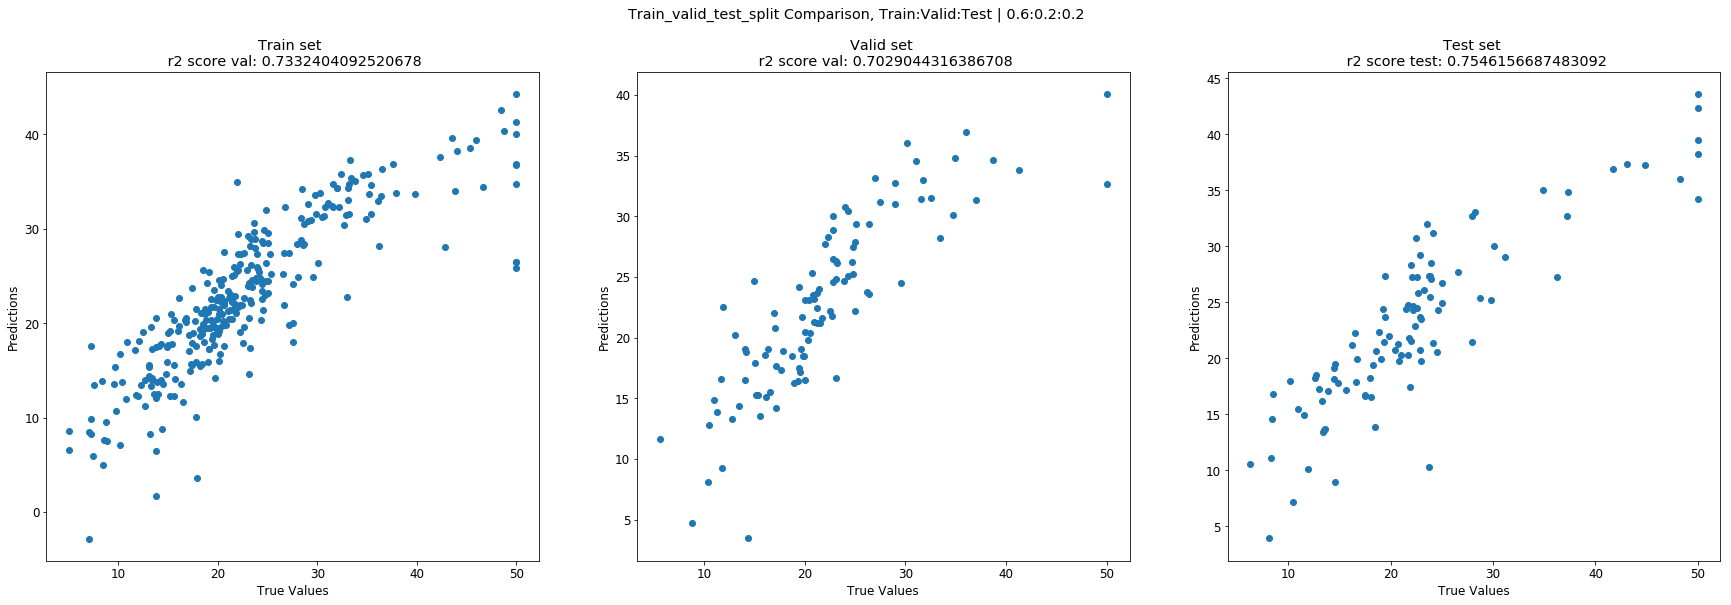

In [131]:
## The line / model

def train_valid_test_prediction_plot(X_train, X_val, X_test, y_train, y_val, y_test, valid_size, test_size):
    plt.figure(figsize = (30,9))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(f'Train_valid_test_split Comparison, Train:Valid:Test | {1-valid_size-test_size:.1f}:{valid_size:.1f}:{test_size:.1f}')

    predictions_train = lm.predict(X_train)
    plt.subplot(131)
    plt.scatter(y_train, predictions_train)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Train set \n r2 score val: {model.score(X_train, y_train)}')

    predictions_val = lm.predict(X_val)
    plt.subplot(132)
    plt.scatter(y_val, predictions_val)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Valid set \n r2 score val: {model.score(X_val, y_val)}')

    predictions_test = lm.predict(X_test)
    plt.subplot(133)
    plt.scatter(y_test, predictions_test)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Test set \n r2 score test: {model.score(X_test, y_test)}')

#     plt.tight_layout()
    
train_valid_test_prediction_plot(X_train, X_val, X_test, y_train, y_val, y_test,valid_size,test_size)

Using similar pipeline like above let's see the effect train test split has on varying split percentage!

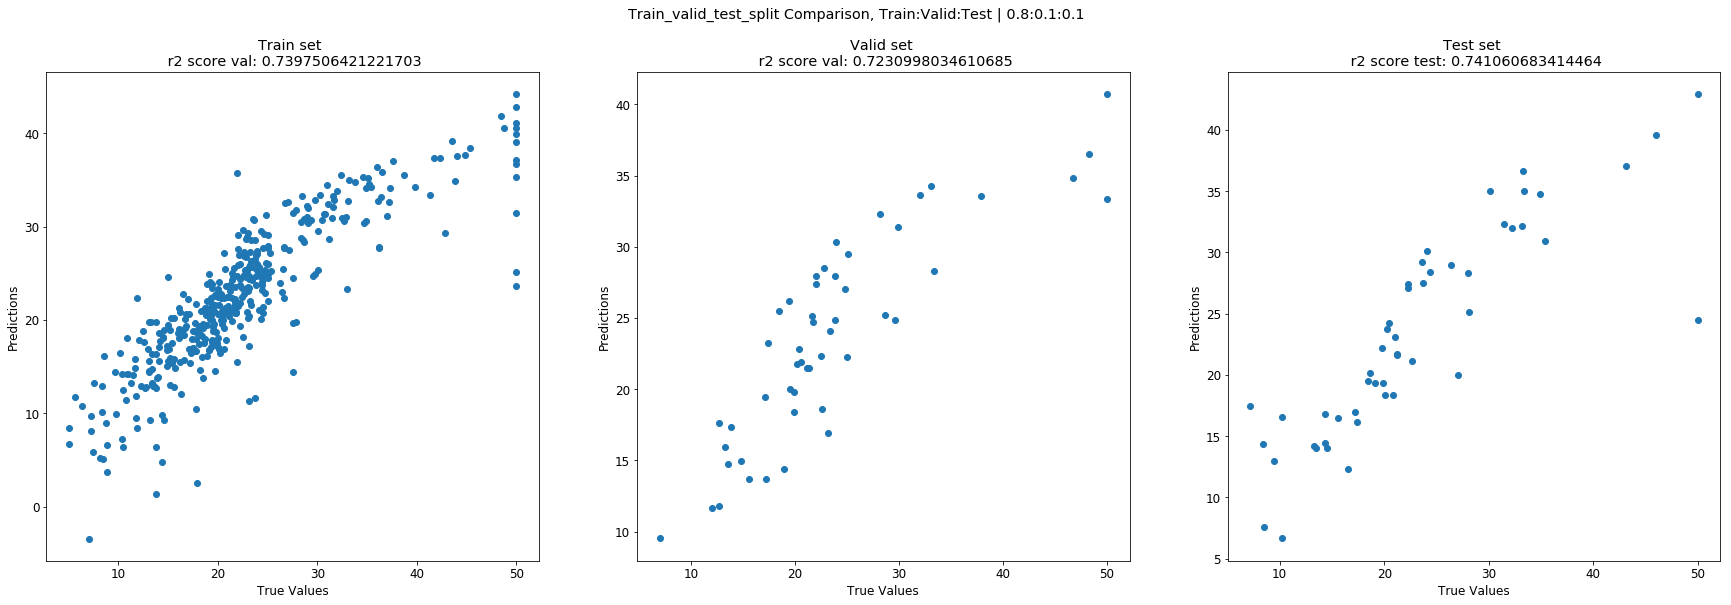

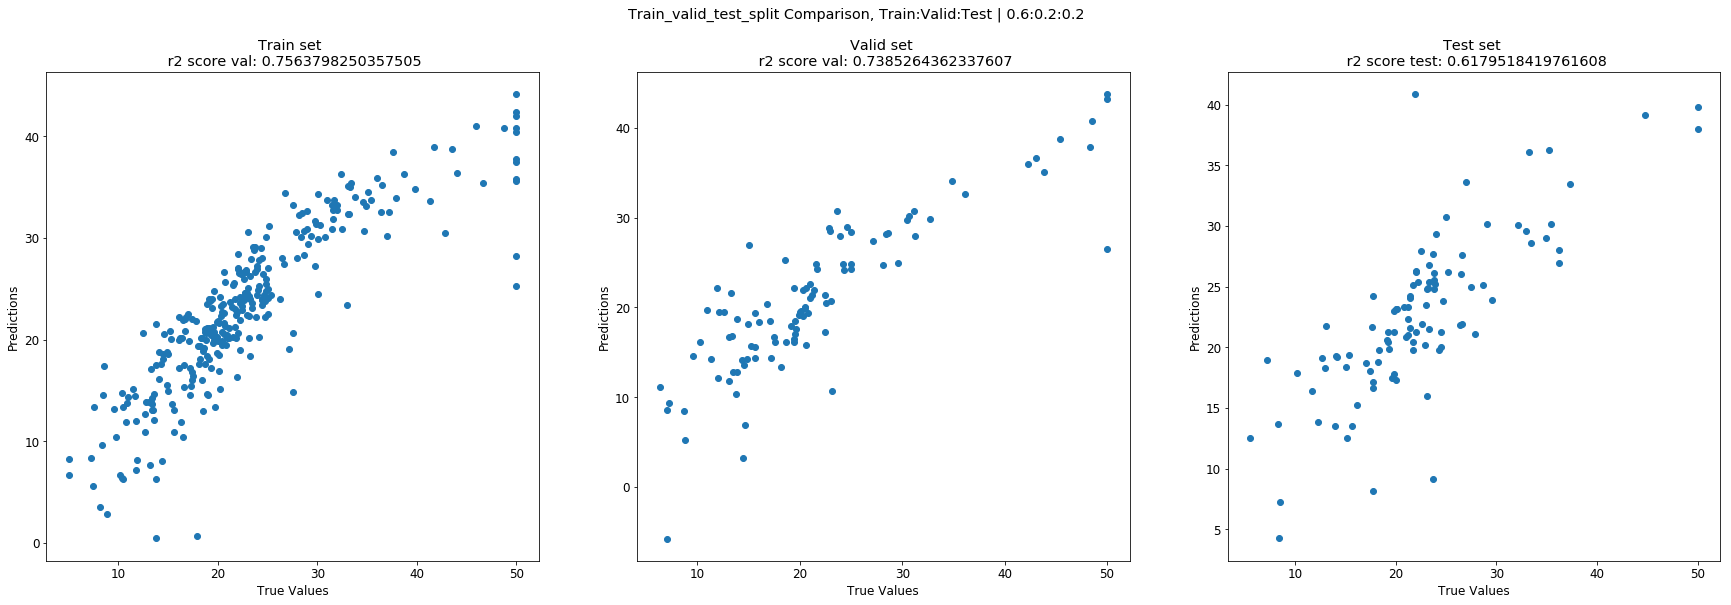

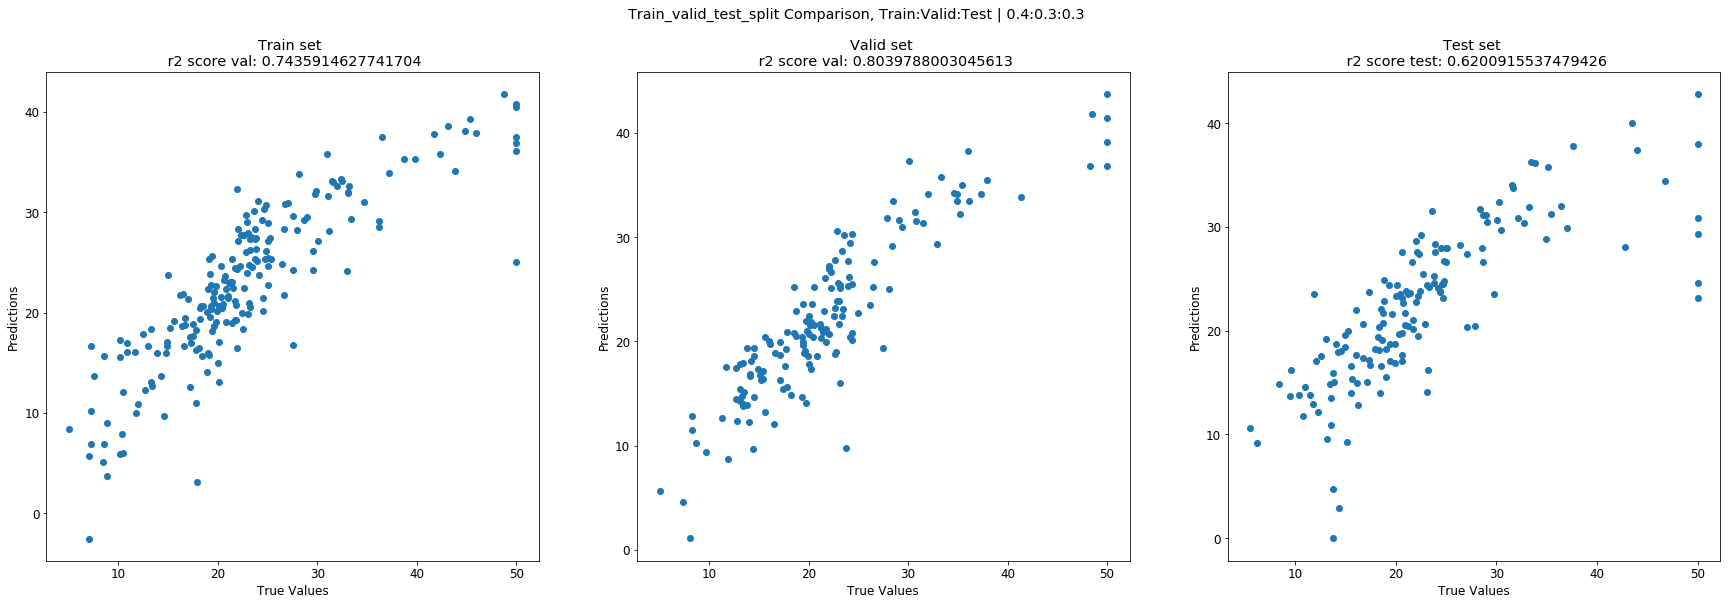

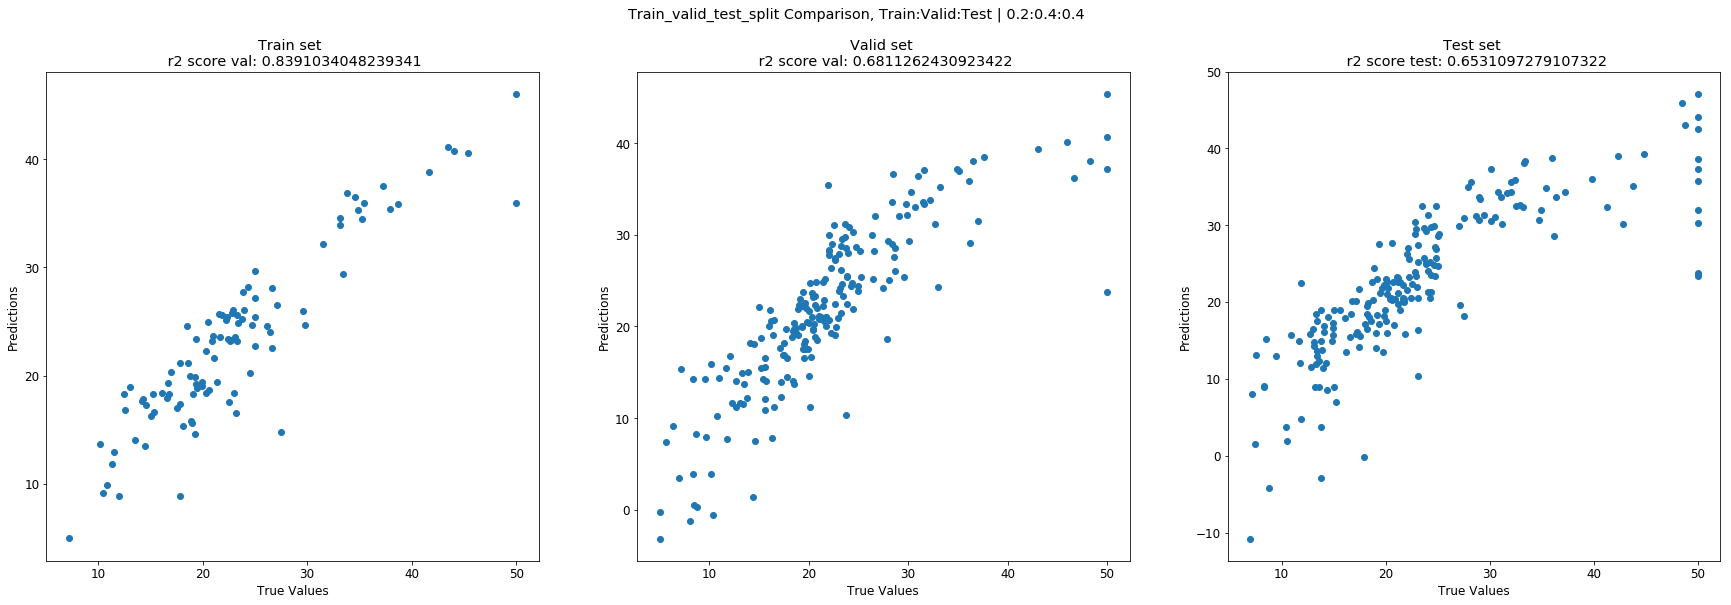

In [135]:
for i in np.arange(0.1, 0.5, 0.1):
    
    X_train, X_val, X_test, y_train, y_val, y_test = train_valid_test_split(df, i, i,False)
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    train_valid_test_prediction_plot(X_train, X_val, X_test, y_train, y_val, y_test, i, i)

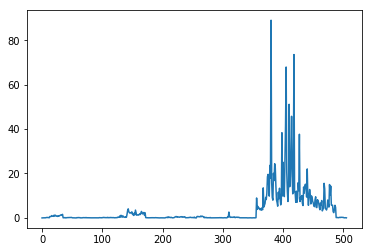

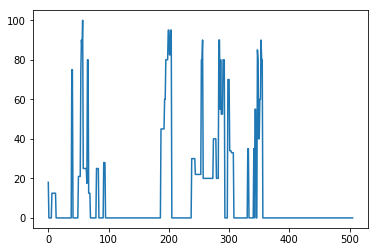

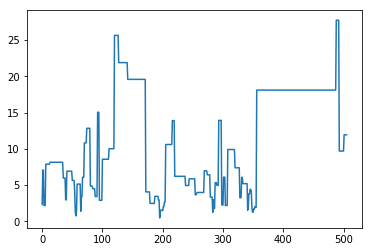

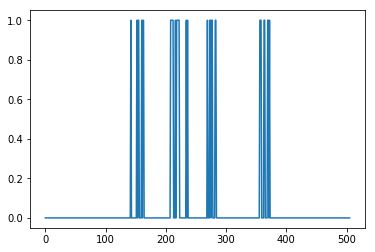

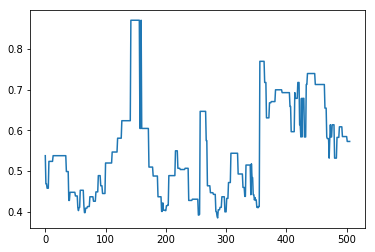

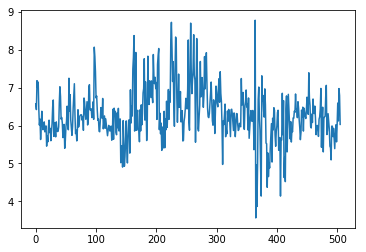

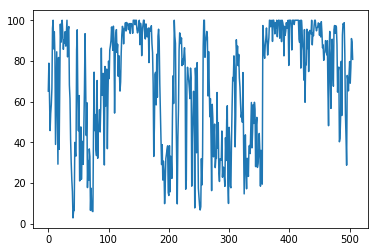

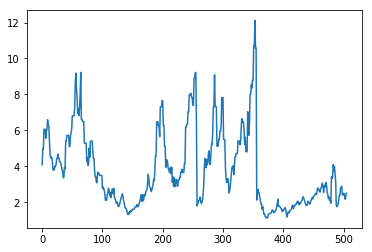

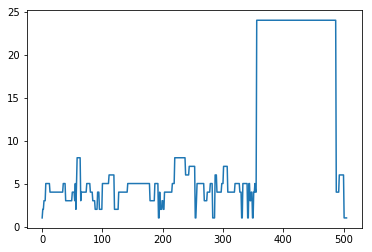

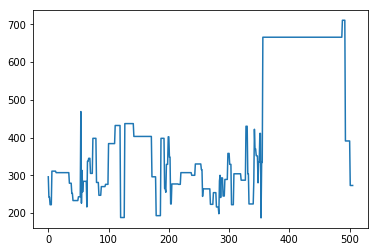

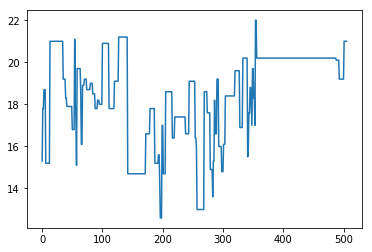

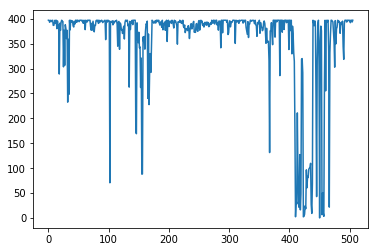

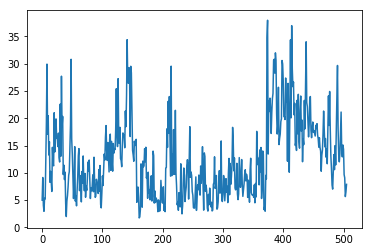

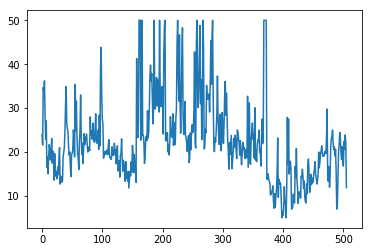

In [45]:
for i in df.columns:
    df.loc[:,i].plot()
    plt.show()